In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Homework
## Problems [Part 1](./01_Linear-Algebra.md)

1. Consider 4 masses connected in series to 4 springs with K=1,000 N/m. What are the final positions of the masses i.e. when acceleration is 0? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, $m_1=1,~m_2=2,~m_3=3,~and~m_4=4 kg.$ Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [2]:
# 1.1

k = 1000
k = np.array([[2*k, -k, 0, 0],
             [-k, 2*k, -k, 0],
             [0, -k, 2*k, -k],
             [0, 0, -k, k]])

print(k)

b= np.array([1, 2, 3, 4])*9.81

print(b)

pos = np.linalg.solve(k,b)

for i in range(len(pos)):
    print('Position of mass {:1.0f}' .format(i+1), 'is {:1.3f} m'.format(pos[i]))

[[ 2000 -1000     0     0]
 [-1000  2000 -1000     0]
 [    0 -1000  2000 -1000]
 [    0     0 -1000  1000]]
[ 9.81 19.62 29.43 39.24]
Position of mass 1 is 0.098 m
Position of mass 2 is 0.186 m
Position of mass 3 is 0.255 m
Position of mass 4 is 0.294 m


![HVAC diagram showing the flow rates and connections between floors](../images/hvac.png)

2. In the figure above you have an idealized Heating, Ventilation and Air conditioning (HVAC) system. In the current configuration, the three-room building is being cooled off by $12^oC$ air fed into the building at 0.1 kg/s. Our goal is to determine the steady-state temperatures of the rooms given the following information

* $\dot{m}_1=0.1~kg/s$
* $\dot{m}_2=0.12~kg/s$
* $\dot{m}_3=0.12~kg/s$
* $\dot{m}_4=0.1~kg/s$
* $\dot{m}_5=0.02~kg/s$
* $\dot{m}_6=0.02~kg/s$
* $C_p=1000~\frac{J}{kg-K}$
* $\dot{Q}_{in} = 300~W$
* $T_{in} = 12^{o} C$

The energy-balance equations for rooms 1-3 create three equations:

1. $\dot{m}_1 C_p T_{in}+\dot{Q}_{in}-\dot{m}_2 C_p T_{1}+\dot{m}_6 C_p T_{2} = 0$

2. $\dot{m}_2 C_p T_{1}+\dot{Q}_{in}+\dot{m}_5 C_p T_{3}-\dot{m}_3 C_p T_{2}-\dot{m}_6 C_p T_{2} = 0$

3. $\dot{m}_3 C_p T_{2}+\dot{Q}_{in}-\dot{m}_5 C_p T_{3}-\dot{m}_4 C_p T_{3} = 0$

Identify the unknown variables and constants to create a linear algebra problem in the form of $\mathbf{Ax}=\mathbf{b}$.

a. Create the matrix $\mathbf{A}$

b. Create the known vector $\mathbf{b}$

c. Solve for the unknown variables, $\mathbf{x}$

d. What are the warmest and coldest rooms? What are their temperatures?

In [3]:
# 1.2a
m1 = 0.1
m2 = 0.12
m3 = 0.12
m4 = 0.1
m5 = 0.02
m6 = 0.02

cp = 1000
qin = 300
tin = 12

A = np.array([[-m2*cp, m6*cp, 0],
             [m2*cp, -(m3*cp+m6*cp), m5*cp],
             [0, m3*cp, -(m5*cp+m4*cp)]])

In [4]:
# 1.2b
b = np.array([-m1*cp*tin-qin, -qin, -qin])

In [5]:
# 1.2c
x = np.linalg.solve(A,b)

In [6]:
# 1.2d
for i in range(len(x)):
    print('Room {:1.0f}' .format(i+1), 'is {:2.1f} C' .format(x[i]))
    
for i in range(len(x)):
    if np.max(x)==x[i]:
        print('Room {:1.0f}' .format(i+1), 'is hottest' .format(x[i]))
    if np.min(x)==x[i]:
        print('Room {:1.0f}' .format(i+1), 'is coldest' .format(x[i]))

Room 1 is 15.6 C
Room 2 is 18.5 C
Room 3 is 21.0 C
Room 1 is coldest
Room 3 is hottest


3. The [Hilbert Matrix](https://en.wikipedia.org/wiki/Hilbert_matrix) has a high condition number and as the matrix increases dimensions, the condition number increases. Find the condition number of a 

a. $1 \times 1$ Hilbert matrix

b. $5 \times 5$ Hilbert matrix

c. $10 \times 10$ Hilbert matrix

d. $15 \times 15$ Hilbert matrix

e. $20 \times 20$ Hilbert matrix

If the accuracy of each matrix element is $\approx 10^{-16}$, what is the expected rounding error in the solution $\mathbf{Ax} = \mathbf{b}$, where $\mathbf{A}$ is the Hilbert matrix.

In [7]:
# IN class

H1 = np.array([[1]])
error_01 = 10**(0-16)
print(error_01)

N = 20
H20 = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        H20[i,j]= 1/(i+j+1)
        
# print(H20)
C20 = np.linalg.cond(H20)
c20 = np.floor(np.log10(C20))

t = np.floor(np.log10(np.finfo(float).eps)) #smallest numer can use for math

error_20 = 10**(18-16)
print(error_20)

1e-16
100


In [8]:
def hurlcond(N):
    ''' Give it the N value and you get the condtion of an NxN hulburt matirx'''
    H20 = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            H20[i,j]= 1/(i+j+1)

    # print(H20)
    C20 = np.linalg.cond(H20)
    c20 = np.floor(np.log10(C20))
    return C20

In [9]:
# 1.3a-e
dimm = np.array([1, 5, 10, 15, 20])

cond = np.zeros(len(dimm))
for i in range(len(dimm)):
    cond[i] = hurlcond(dimm[i])
    print('Condition of {:2.0f}x{:2.0f}' .format(dimm[i], dimm[i]), 'is {:2.2e}' .format(cond[i]))

Condition of  1x 1 is 1.00e+00
Condition of  5x 5 is 4.77e+05
Condition of 10x10 is 1.60e+13
Condition of 15x15 is 3.37e+17
Condition of 20x20 is 6.81e+18


## Problems [Part 2](./02_Gauss_elimination.md)

1. 4 masses are connected in series to 4 springs with K=100N/m. What are the final positions of the masses? 

![Springs-masses](../images/mass_springs.png)

The masses haves the following amounts, 1, 2, 3, and 4 kg for masses 1-4. Using a FBD for each mass:

$m_{1}g+k(x_{2}-x_{1})-kx_{1}=0$

$m_{2}g+k(x_{3}-x_{2})-k(x_{2}-x_{1})=0$

$m_{3}g+k(x_{4}-x_{3})-k(x_{3}-x_{2})=0$

$m_{4}g-k(x_{4}-x_{3})=0$

in matrix form K=100 N/m:

$\left[ \begin{array}{cccc}
2k & -k & 0 & 0 \\
-k & 2k & -k & 0 \\
0 & -k & 2k & -k \\
0 & 0 & -k & k \end{array} \right]
\left[ \begin{array}{c}
x_{1} \\
x_{2} \\
x_{3} \\
x_{4} \end{array} \right]=
\left[ \begin{array}{c}
m_{1}g \\
m_{2}g \\
m_{3}g \\
m_{4}g \end{array} \right]$

In [10]:
# Use gaussNaive to solve this instead of np.linalg
def GaussNaive(A,y):
    '''GaussNaive: naive Gauss elimination
    x = GaussNaive(A,b): Gauss elimination without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    y = right hand side vector
    returns:
    ---------
    x = solution vector
    Aug = augmented matrix (used for back substitution)'''
    [m,n] = np.shape(A)
    Aug = np.block([A,y.reshape(n,1)])
    Aug = Aug.astype(float)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination 
    for k in range(0,n-1):
        for i in range(k+1,n):
            if Aug[i,k] != 0.0:
                factor = Aug[i,k]/Aug[k,k]
                Aug[i,:] = Aug[i,:] - factor*Aug[k,:]
    # Back substitution
    x=np.zeros(n)
    for k in range(n-1,-1,-1):
        x[k] = (Aug[k,-1] - Aug[k,k+1:n]@x[k+1:n])/Aug[k,k]
    return x,Aug

def LUNaive(A):
    '''LUNaive: naive LU decomposition
    L,U = LUNaive(A): LU decomposition without pivoting.
    solution method requires floating point numbers, 
    as such the dtype is changed to float
    
    Arguments:
    ----------
    A = coefficient matrix
    returns:
    ---------
    L = Lower triangular matrix
    U = Upper triangular matrix
    '''
    [m,n] = np.shape(A)
    if m!=n: error('Matrix A must be square')
    nb = n+1
    # Gauss Elimination
    U = A.astype(float)
    L = np.eye(n)

    for k in range(0,n-1):
        for i in range(k+1,n):
            if U[k,k] != 0.0:
                factor = U[i,k]/U[k,k]
                L[i,k]=factor
                U[i,:] = U[i,:] - factor*U[k,:]
    return L,U

def solveLU(L,U,b):
    '''solveLU: solve for x when LUx = b
    x = solveLU(L,U,b): solves for x given the lower and upper 
    triangular matrix storage
    uses forward substitution for 
    1. Ly = b
    then backward substitution for
    2. Ux = y
    
    Arguments:
    ----------
    L = Lower triangular matrix
    U = Upper triangular matrix
    b = output vector
    
    returns:
    ---------
    x = solution of LUx=b '''
    n=len(b)
    x=np.zeros(n)
    y=np.zeros(n)
        
    # forward substitution
    for k in range(0,n):
        y[k] = b[k] - L[k,0:k]@y[0:k]
    # backward substitution
    for k in range(n-1,-1,-1):
        x[k] = (y[k] - U[k,k+1:n]@x[k+1:n])/U[k,k]
    return x

In [11]:
# 2.1
k = 1000
k = np.array([[2*k, -k, 0, 0],
             [-k, 2*k, -k, 0],
             [0, -k, 2*k, -k],
             [0, 0, -k, k]])

b= np.array([1, 2, 3, 4])*9.81

pos1, aug = GaussNaive(k,b)

for i in range(len(pos)):
    print('Position of mass {:1.0f}' .format(i+1), 'is {:1.3f} m'.format(pos[i]))

Position of mass 1 is 0.098 m
Position of mass 2 is 0.186 m
Position of mass 3 is 0.255 m
Position of mass 4 is 0.294 m


In [12]:
# In class



A = np.array([[2,1],
             [ 3,9]])

b= np.array([1,1])

x,Aug = GaussNaive(A,b)

print('A')
print(A)
print('Aug')
print(Aug)

L,U = LUNaive(A)

print('Upper')
print(U)
print('Lower')
print(L)

L@U

from scipy.linalg import lu

lu(A)

A
[[2 1]
 [3 9]]
Aug
[[ 2.   1.   1. ]
 [ 0.   7.5 -0.5]]
Upper
[[2.  1. ]
 [0.  7.5]]
Lower
[[1.  0. ]
 [1.5 1. ]]


(array([[0., 1.],
        [1., 0.]]),
 array([[1.        , 0.        ],
        [0.66666667, 1.        ]]),
 array([[ 3.,  9.],
        [ 0., -5.]]))

![Triangular truss](../images/truss.png)

For problems __2-3__, consider the simple 3-element triangular truss, shown above, with a point load applied at the tip. The goal is to understand what tension is in the horizontal element, $P_1$. In problem __2__, the applied force is verical $(\theta=0)$ and in problem __3__ the applied force varies in angle $(\theta \neq 0)$. 

2. In the truss shown above, calculate the tension in bar 1, $P_1$, when $\theta=0$. When $\theta=0$, the $\sum F=0$ at each corner creates 3 equations and 3 unknowns as such (here, you reduce the number of equations with symmetry, $P_2=P_3,~R_2=R_3,~and~R_1=0$ ). 

$\left[ \begin{array}{ccc}
1 & \cos\alpha & 0 \\
0 & -2\cos\beta/2 & 0 \\
0 & \sin\alpha &  1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
R_{2} \end{array} \right]=
\left[ \begin{array}{c}
0 \\
F \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=35^o$, $\beta=40^o$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~and~R_2$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination?

b. Solve for the $\mathbf{LU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{LU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [13]:
# 2.2a
a = 35*np.pi/180
b = 45*np.pi/180

F = 1000

LHS = np.array([[1, np.cos(a),0],
               [0, -2*np.cos(b/2), 0],
               [0, np.sin(a), 1]])

RHS = np.array([0, F, 0])

sol22, aug22 = GaussNaive(LHS, RHS)
print('Augmented matrix \n', aug22)
var = np.array(['P_1', 'P_2', 'R_2'])

for i in range(len(sol22)):
    print('{}' .format(var[i]), '= {:3.1f}'.format(sol22[i]))

Augmented matrix 
 [[ 1.00000000e+00  8.19152044e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -1.84775907e+00  0.00000000e+00  1.00000000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  3.10417330e+02]]
P_1 = 443.3
P_2 = -541.2
R_2 = 310.4


In [14]:
# 2.2b
L,U = LUNaive(LHS)

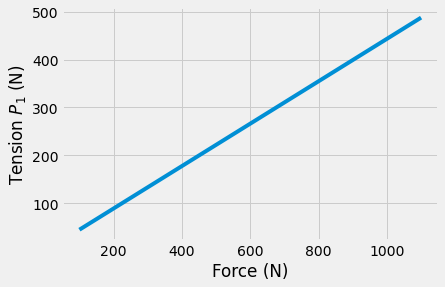

In [15]:
# 2.2c

F2 = np.arange(100,1110,10)
sol22 = np.zeros(len(F2))

for i in range(len(F2)):
    F = np.array([0, F2[i], 0])
    pee = np.linalg.solve(U, F)
    sol22[i] = pee[0]

plt.plot(F2, sol22)
plt.xlabel('Force (N)')
plt.ylabel('Tension $P_1$ (N)');

3. Using the same truss as shown above, let's calculate the tension in bar 1, $P_1$, when $\theta=[0...90^o]$ and $F=[100...1100]~kN$. When $\theta\neq 0$, the resulting 6 equations and 6 unknowns are given in the following matrix

$\left[ \begin{array}{ccc}
0 & \sin\alpha & 0 & 1 & 0 & 0 \\
1 & \cos\alpha & 0 & 0 & 1 & 0 \\
0 & \cos\beta/2 & \cos\beta/2 & 0 & 0 & 0 \\
0 & -\sin\beta/2 & \sin\beta/2 & 0 & 0 & 0 \\
-1 & 0 & \cos\alpha & 0 & 0 & 0 \\
0 & 0 & \sin\alpha & 0 & 0 & 1 \\
 \end{array} \right]
\left[ \begin{array}{c}
P_{1} \\
P_{2} \\
P_{3} \\
R_{1} \\
R_{2} \\
R_{3}\end{array} \right]=
\left[ \begin{array}{c}
0 \\
0 \\
F\cos\theta \\
-F\sin\theta \\
0 \\
0 \end{array} \right]$

a. Create the system of equations, $\mathbf{Ax}=\mathbf{b}$, when $\alpha=35^o$, $\beta=40^o$, $\theta=45^o=\pi/4$, and $F=1~kN$. Use __Gauss elimination__ to solve for $P_1,~P_2,~P_3,~R_1,~R_2,~and~R_3$. What is the resulting augmented matrix, $\mathbf{A|y}$ after Gauss elimination? _Hint: do you see a problem with the order of the equations? How can you __pivot__ to fix it?_

b. Solve for the $\mathbf{PLU}$ decomposition of $\mathbf{A}$. 

c. Use the $\mathbf{PLU}$ solution to solve for the tension in bar 1 $(P_1)$ every 10 N values of force, F, between 100 N and 1100 N. Plot $P_1~vs~F$.

In [16]:
# 2.3a

a = np.deg2rad(35)
b = np.deg2rad(40)
theta = np.deg2rad(45)

F = 1000
var = np.array(['P_1', 'P_2', 'P_3', 'R_1', 'R_2', 'R_3'])
LHS = np.array([[0, np.sin(a), 0, 1, 0, 0],
             [1, np.cos(a), 0, 0, 1, 0],
             [0, np.cos(b/2), np.cos(b/2), 0, 0, 0],
             [0, -np.sin(b/2), np.sin(b/2), 0, 0, 0],
             [-1, 0, np.cos(a), 0, 0, 0],
             [0, 0, np.sin(a), 0, 0, 1]])


RHS = np.array([0, 0, F*np.cos(theta), -F*np.sin(theta),0 , 0])
# Pivot rows, swap row 2 and 1 
LHS[[1,0]]=LHS[[0,1]]
var[[1,0]]=var[[0,1]]
RHS[[1,0]]=RHS[[0,1]]
sol, aug = GaussNaive(LHS, RHS)

for i in range(len(sol)):
    print('{}' .format(var[i]), '= {:3.1f}'.format(sol[i]))
    
print('Augmented matrix: \n', aug)

P_2 = -538.6
P_1 = 1410.0
P_3 = -657.5
R_1 = -808.7
R_2 = -616.4
R_3 = 377.1
Augmented matrix: 
 [[ 1.00000000e+00  8.19152044e-01  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.73576436e-01  0.00000000e+00  1.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.39692621e-01 -1.63830409e+00
   0.00000000e+00  0.00000000e+00  7.07106781e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.19258785e+00
   0.00000000e+00  0.00000000e+00 -9.64472602e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00 -6.16401526e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00  3.77113486e+02]]


In [17]:
# 2.3b
from scipy.linalg import lu

P,L,U = lu(LHS) # a built-in partial-pivoting LU decomposition function
# print('P=\n',P)
# print('L=\n',L)
# print('U=\n',U)

sol = solveLU(L,U,P.T@RHS)
for i in range(len(sol)):
    print('{}' .format(var[i]), '= {:3.1f}'.format(sol[i]))

P_2 = -538.6
P_1 = 1410.0
P_3 = -657.5
R_1 = -808.7
R_2 = -616.4
R_3 = 377.1


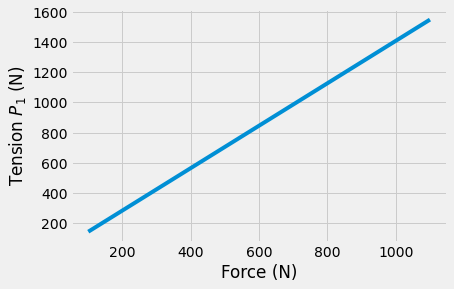

In [18]:
# 2.3c
F = np.arange(100,1110,10)
sol = np.zeros(len(F))

for i in range(len(F)):
    RHS = np.array([0, 0, F[i]*np.cos(theta), -F[i]*np.sin(theta),0 , 0])
    pee = solveLU(L,U,P.T@RHS)
    sol[i] = pee[1]
    
plt.plot(F, sol)
plt.xlabel('Force (N)')
plt.ylabel('Tension $P_1$ (N)');

In [19]:
# In class
A = np.array([[0, np.sin(np.pi/3)],
             [1, np.cos(np.pi/3)]])
print(GaussNaive(A, np.array([0,0])))

# fix error by switching rows, gets rid of divife by zero
# need to swap rows in the matrix for number 3
A = np.array([[1, np.cos(np.pi/3)],
              [0, np.sin(np.pi/3)]])
print(GaussNaive(A, np.array([0,0])))

(array([nan, nan]), array([[0.       , 0.8660254, 0.       ],
       [      nan,      -inf,       nan]]))
(array([0., 0.]), array([[1.       , 0.5      , 0.       ],
       [0.       , 0.8660254, 0.       ]]))


/tmp/ipykernel_263/3590145344.py:25: RuntimeWarning: divide by zero encountered in double_scalars
  factor = Aug[i,k]/Aug[k,k]
/tmp/ipykernel_263/3590145344.py:26: RuntimeWarning: invalid value encountered in multiply
  Aug[i,:] = Aug[i,:] - factor*Aug[k,:]


## Problems [Part 3](./03_Linear-regression-algebra.md)

<img
src="https://i.imgur.com/LoBbHaM.png" alt="prony series diagram"
style="width: 300px;"/> <img src="https://i.imgur.com/8i140Zu.png" alt
= "stress relax data" style="width: 400px;"/> 

Viscoelastic Prony series model and stress-vs-time relaxation curve of wheat kernels [[3]](https://www.cerealsgrains.org/publications/plexus/cfw/pastissues/2013/Documents/CFW-58-3-0139.pdf). Stress relaxation curve of a wheat kernel from regressed equation data that illustrate where to locate relaxation times (vertical dotted lines) and stresses (horizontal black marks). $\sigma$ = stress; t = time.

2. [Viscoelasticity](https://en.wikipedia.org/wiki/Viscoelasticity) is a property of materials that exhibit stiffness, but also tend to flow slowly. One example is [Silly Putty](https://en.wikipedia.org/wiki/Silly_Putty), when you throw a lump it bounces, but if you leave it on a table it _creeps_, slowly flowing downwards. In the stress-vs-time plot above, a wheat kernel was placed under constant strain and the stress was recorded. In a purely elastic material, the stress would be constant. In a purely viscous material, the stress would decay to 0 MPa. 

Here, you have a viscoelastic material, so there is some residual elastic stress as $t\rightarrow \infty$. The researchers used a 4-part [Prony series](https://en.wikipedia.org/wiki/Prony%27s_method) to model viscoelasticity. The function they fit was

$\sigma(t) = a_1 e^{-t/1.78}+a_2 e^{-t/11}+a_3e^{-t/53}+a_4e^{-t/411}+a_5$

a. Load the data from the graph shown above in the file `../data/stress_relax.dat`. 

b. Create a $\mathbf{Z}$-matrix to perform the least-squares regression for the given Prony series equation $\mathbf{y} = \mathbf{Za}$.

c. Solve for the constants, $a_1,~a_2,~a_3,~a_4~,a_5$

d. Plot the best-fit function and the data from `../data/stress_relax.dat` _Use at least 50 points in time to get a smooth best-fit line._

In [20]:
# 3.2a
# ! head ../data/stress_relax.dat #show first 10 lines of data 

data = np.loadtxt('../data/stress_relax.dat', 
                  skiprows=1, 
                  delimiter=',')

stress = data[:,1]
t = data[:,0]
# plt.plot(time, stress, 's')

In [21]:
# 3.2b
Z = np.block([[np.exp(-t/1.78)], [np.exp(-t/11)], [np.exp(-t/53)], [np.exp(-t/411)], [t**0]]).T

In [22]:
# 3.2c
a = np.linalg.solve(Z.T@Z,Z.T@stress)

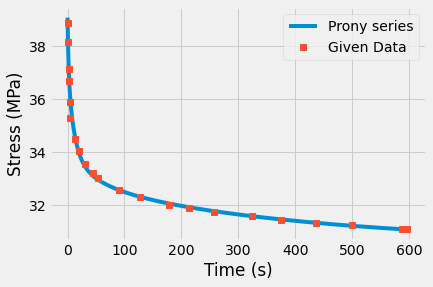

In [23]:
# 3.2d
time = np.linspace(0,600,1500)
sigma = a[0]*np.exp(-time/1.78)+a[1]*np.exp(-time/11)+a[2]*np.exp(-time/53)+a[3]*np.exp(-time/411)+a[4]
plt.plot(time,sigma, label=('Prony series'))
plt.plot(t, stress, 's', label=('Given Data'))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Stress (MPa)');

3. Load the '../data/primary-energy-consumption-by-region.csv' that has the energy consumption of different regions of the world from 1965 until 2018 [Our world in Data](https://ourworldindata.org/energy). 
You are going to compare the energy consumption of the United States to all of Europe. Load the data into a pandas dataframe. *Note: you can get certain rows of the data frame by specifying what you're looking for e.g. 
`EUR = dataframe[dataframe['Entity']=='Europe']` will give us all the rows from Europe's energy consumption.*

a. Use a piecewise least-squares regression to find a function for the energy consumption as a function of year

energy consumed = $f(t) = At+B+C(t-1970)H(t-1970)$

c. What is your prediction for US energy use in 2025? How about European energy use in 2025?

In [24]:
# 3.3
import pandas as pd
# ! head ../data/primary-energy-consumption-by-region.csv
data = pd.read_csv('../data/primary-energy-consumption-by-region.csv')

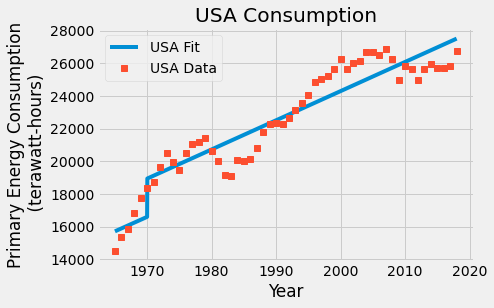

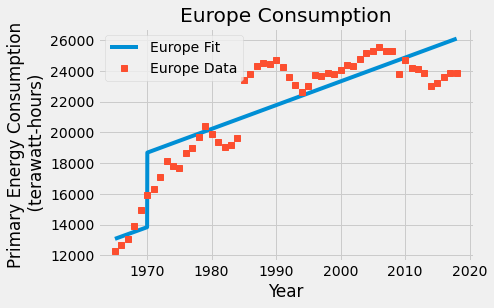

In [25]:
# 3.3a
eur = data[data['Entity']=='Europe']
usa = data[data['Entity']=='United States']

t = usa['Year']
Z = np.block([[t**1], [t**0], [(t>=1970)*t**1]]).T

a_usa = np.linalg.solve(Z.T@Z,Z.T@usa['Primary Energy Consumption (terawatt-hours)'])
a_eur = np.linalg.solve(Z.T@Z,Z.T@eur['Primary Energy Consumption (terawatt-hours)'])

time = np.linspace(1965, 2018, 1500)
en_usa = a_usa[0]*time + a_usa[1] + a_usa[2]*(time>=1970)*time**1
en_eur = a_eur[0]*time + a_eur[1] + a_eur[2]*(time>=1970)*time**1

# plot usa
plt.figure()
plt.plot(time, en_usa, label='USA Fit')
plt.plot(t, usa['Primary Energy Consumption (terawatt-hours)'], 's', label='USA Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption\n (terawatt-hours)')
plt.title('USA Consumption');
# plot eur
plt.figure()
plt.plot(time, en_eur, label='Europe Fit')
plt.plot(t, eur['Primary Energy Consumption (terawatt-hours)'], 's', label='Europe Data')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption\n (terawatt-hours)')
plt.title('Europe Consumption');

In [26]:
# 3.3c
time=2025

en_usa25 = a_usa[0]*time + a_usa[1] + a_usa[2]*(time>=1970)*time**1
en_eur25 = a_eur[0]*time + a_eur[1] + a_eur[2]*(time>=1970)*time**1

print('USA energy use in 2025: {:1.0f} terawatt-hours' .format(en_usa25))
print('Europe energy use in 2025: {:1.0f} terawatt-hours' .format(en_eur25))

USA energy use in 2025: 28769 terawatt-hours
Europe energy use in 2025: 27180 terawatt-hours


In [27]:
# In class heavyside
t = np.arange(1900, 2000, 10)
Z = np.block([[t**1], [t**0], [(t>=1970)*t**1]]).T